## Imports

In [1]:
import sys
sys.path.append('../')
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
from insiders.models.denselstm import DenseLSTM
from b3data.stocks import Stocks, CLOSING, OPENING, MAX_PRICE
from b3data.stocks import MIN_PRICE, MEAN_PRICE, VOLUME
from b3data.utils.smote import duplicate_data
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Rectangle

Using TensorFlow backend.


### Get stocks data and duplicate the TimeSerie

In [2]:
stocks = Stocks(year=2014, cod='VALE3', period=5)
dataset = stocks.selected_fields([CLOSING])
dataset = duplicate_data(dataset)

### Model initialization

In [3]:
model = DenseLSTM(input_shape=dataset.shape[1],
                  look_back=6, lstm_cells=50, optimizer='rmsprop')
model.create_data_for_fit(dataset)

### Training model

In [4]:
result = model.fit_and_evaluate(batch_size=2, epochs=5000)

2/2 [==============================] - 0s 10ms/step
[NeuralNetwork] Test Accuracy:0.800000011920929


### Make prediction

In [5]:
prediction = model.model.predict(model.test_x)
prediction_labels = [1 if Decimal(i.item()) >= Decimal(0.50) else 0 for i in prediction]

### Plotting the prediction on Real data

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]


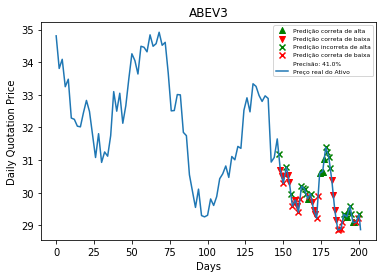

In [6]:
prediction = model.model.predict(model.test_x)
prediction_labels = [1 if Decimal(i.item()) >= Decimal(0.50) else 0 for i in prediction]

avarange_dataset = [np.mean(dataset[i:i+9]) for i in range(len(dataset))]
begin_test = int(len(dataset) - len(model.test_x))
correct_labels = [1 if dataset[i+1] >= dataset[i] else 0 for i in range(begin_test, len(dataset)-1)]
print(correct_labels)
x = list(range(begin_test, len(dataset)))
y = dataset[begin_test:len(dataset)]
plt.ylabel("Daily Quotation Price")
plt.xlabel("Days")
plt.title("ABEV3")
score = 0
for i in range(len(x)-1):
    if prediction_labels[i] == 1:
        if prediction_labels[i] == correct_labels[i]:
            h = plt.scatter(x[i], y[i], marker='^', c='green')
            score += 1
        else:
            hx = plt.scatter(x[i], y[i], marker='x', c='green')
    else:
        if prediction_labels[i] == correct_labels[i]:
            l = plt.scatter(x[i], y[i], marker='v', c='red')
            score += 1
        else:
            lx = plt.scatter(x[i], y[i], marker='x', c='red')

d_label, = plt.plot(dataset)
# a_label, = plt.plot(avarange_dataset, 'o')

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend((h,l,hx,lx,extra, d_label), ("Predição correta de alta",
                                        "Predição correta de baixa",
                                        "Predição incorreta de alta",
                                        "Predição correta de baixa",
                                        "Precisão: {}%".format(round(score/(len(x)-1), 2)*100),
                                        "Preço real do Ativo"), fontsize=6)

plt.show()
